In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('quora.csv',nrows=30000)

In [ ]:
df.shape

(30000, 6)

In [ ]:
new_df = df.sample(30000,random_state=2)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
7945,21534,40537,40538,Which is the best antivirus currently?,Which is the best antivirus ever?,1
16536,9769,18971,18972,What foods should you eat to make your penis b...,What should someone eat to make a larger penis?,0
26726,19959,37695,2766,How do I start up a new cafe?,What's the best why to start up a cafe?,1
16333,9566,18580,18581,What is the most popular porn niche on Internet?,What are the most popular/viral hoax of the in...,0
20629,13862,26585,26586,"There are 66 hand shakes, how many people ther...",If 10 people meet each other and each shakes h...,0


In [ ]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
new_df=new_df.dropna()

In [ ]:
new_df.shape

(50000, 6)

In [ ]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
36819,30052,55554,55555,Should I take advice from people on Quora or j...,Quora: Should I take advice from people on Quora?,1
23918,17151,32635,32636,How much will it cost to design and develop a ...,How much would it cost to design and develop a...,0
1388,1388,2766,2767,What's the best why to start up a cafe?,What are requirements I would need to start my...,1
53220,46453,83094,83095,How do I get a reply to the first introduction...,Which opening lines should be used in first em...,1
39500,32733,60221,60222,What are the perks of an IAS?,What are the perks of being an IAS officer?,1


0    31330
1    18670
Name: is_duplicate, dtype: int64
0    62.66
1    37.34
Name: is_duplicate, dtype: float64


<Axes: >

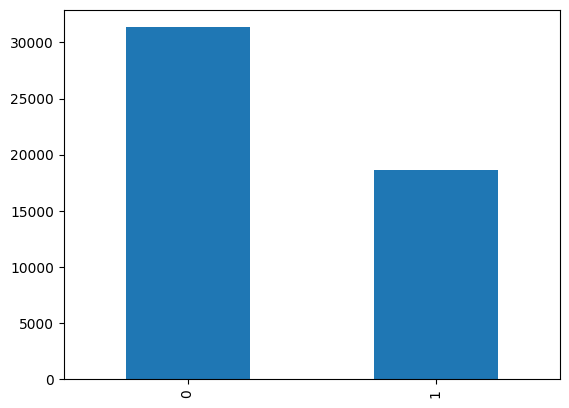

In [ ]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 79476
Number of questions getting repeated 15687


In [ ]:
from collections import Counter
qid = list(new_df['qid1'])+list(new_df['qid2'])
print('Number of unique questions',np.unique(qid).shape[0])
d=Counter(qid)
y=list([item for item in d if d[item]>1])
print('Number of questions getting repeated',len(y))

Number of unique questions 79476
Number of questions getting repeated 15687


In [ ]:
print(qid.value_counts())

30782.0     10
2675.0       9
877.0        7
38.0         7
17854.0      7
            ..
5632.0       1
140025.0     1
40294.0      1
158798.0     1
13910.0      1
Length: 55415, dtype: int64


In [ ]:
counter_result=Counter(qid)
sorted_result=dict(counter_result.most_common())
print(sorted_result)

{30782.0: 10, 2675.0: 9, 20105.0: 7, 877.0: 7, 4018.0: 7, 9708.0: 7, 9662.0: 7, 17978.0: 7, 6312.0: 7, 17854.0: 7, 10382.0: 7, 19931.0: 7, 2559.0: 7, 65693.0: 7, 24054.0: 7, 38.0: 7, 48722.0: 7, 2195.0: 6, 2656.0: 6, 46330.0: 6, 145.0: 6, 40173.0: 6, 10234.0: 6, 1749.0: 6, 4950.0: 6, 1886.0: 6, 5241.0: 6, 7842.0: 6, 54749.0: 6, 18296.0: 6, 24472.0: 6, 20542.0: 6, 18753.0: 6, 7801.0: 6, 4100.0: 6, 9900.0: 6, 5518.0: 6, 21554.0: 6, 4380.0: 6, 5724.0: 5, 6799.0: 5, 43839.0: 5, 4044.0: 5, 4951.0: 5, 38362.0: 5, 6274.0: 5, 3938.0: 5, 48082.0: 5, 40724.0: 5, 2929.0: 5, 10321.0: 5, 33031.0: 5, 2323.0: 5, 30681.0: 5, 36120.0: 5, 10908.0: 5, 41597.0: 5, 17812.0: 5, 3595.0: 5, 21876.0: 5, 1274.0: 5, 18953.0: 5, 19199.0: 5, 2854.0: 5, 6480.0: 5, 13748.0: 5, 19500.0: 5, 25673.0: 5, 18276.0: 5, 17057.0: 5, 11477.0: 5, 35003.0: 5, 52298.0: 5, 20152.0: 5, 50822.0: 5, 13324.0: 5, 36823.0: 5, 10473.0: 5, 4476.0: 5, 35498.0: 5, 24861.0: 5, 66031.0: 5, 9588.0: 5, 1772.0: 5, 15671.0: 5, 13144.0: 5, 19621.

In [ ]:
plt.bar(sorted_result.values(),sorted_result.keys(),color='blue')
plt.yscale('log')
plt.show()

NameError: name 'sorted_result' is not defined

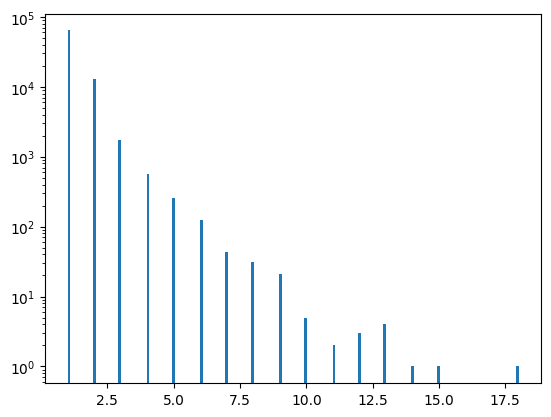

In [ ]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [ ]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
36819,30052,55554,55555,Should I take advice from people on Quora or j...,Quora: Should I take advice from people on Quora?,1,69,49
23918,17151,32635,32636,How much will it cost to design and develop a ...,How much would it cost to design and develop a...,0,71,78
1388,1388,2766,2767,What's the best why to start up a cafe?,What are requirements I would need to start my...,1,39,56
53220,46453,83094,83095,How do I get a reply to the first introduction...,Which opening lines should be used in first em...,1,76,98
39500,32733,60221,60222,What are the perks of an IAS?,What are the perks of being an IAS officer?,1,29,43


In [ ]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
36819,30052,55554,55555,Should I take advice from people on Quora or j...,Quora: Should I take advice from people on Quora?,1,69,49,14,9
23918,17151,32635,32636,How much will it cost to design and develop a ...,How much would it cost to design and develop a...,0,71,78,13,13
1388,1388,2766,2767,What's the best why to start up a cafe?,What are requirements I would need to start my...,1,39,56,9,11
53220,46453,83094,83095,How do I get a reply to the first introduction...,Which opening lines should be used in first em...,1,76,98,15,20
39500,32733,60221,60222,What are the perks of an IAS?,What are the perks of being an IAS officer?,1,29,43,7,9


In [ ]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
36819,30052,55554,55555,Should I take advice from people on Quora or j...,Quora: Should I take advice from people on Quora?,1,69,49,14,9
23918,17151,32635,32636,How much will it cost to design and develop a ...,How much would it cost to design and develop a...,0,71,78,13,13
1388,1388,2766,2767,What's the best why to start up a cafe?,What are requirements I would need to start my...,1,39,56,9,11
53220,46453,83094,83095,How do I get a reply to the first introduction...,Which opening lines should be used in first em...,1,76,98,15,20
39500,32733,60221,60222,What are the perks of an IAS?,What are the perks of being an IAS officer?,1,29,43,7,9


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [ ]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
36819,30052,55554,55555,Should I take advice from people on Quora or j...,Quora: Should I take advice from people on Quora?,1,69,49,14,9,7
23918,17151,32635,32636,How much will it cost to design and develop a ...,How much would it cost to design and develop a...,0,71,78,13,13,11
1388,1388,2766,2767,What's the best why to start up a cafe?,What are requirements I would need to start my...,1,39,56,9,11,3
53220,46453,83094,83095,How do I get a reply to the first introduction...,Which opening lines should be used in first em...,1,76,98,15,20,6
39500,32733,60221,60222,What are the perks of an IAS?,What are the perks of being an IAS officer?,1,29,43,7,9,6


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [ ]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
36819,30052,55554,55555,Should I take advice from people on Quora or j...,Quora: Should I take advice from people on Quora?,1,69,49,14,9,7,23
23918,17151,32635,32636,How much will it cost to design and develop a ...,How much would it cost to design and develop a...,0,71,78,13,13,11,26
1388,1388,2766,2767,What's the best why to start up a cafe?,What are requirements I would need to start my...,1,39,56,9,11,3,20
53220,46453,83094,83095,How do I get a reply to the first introduction...,Which opening lines should be used in first em...,1,76,98,15,20,6,31
39500,32733,60221,60222,What are the perks of an IAS?,What are the perks of being an IAS officer?,1,29,43,7,9,6,16


In [ ]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
36819,30052,55554,55555,Should I take advice from people on Quora or j...,Quora: Should I take advice from people on Quora?,1,69,49,14,9,7,23,0.30
23918,17151,32635,32636,How much will it cost to design and develop a ...,How much would it cost to design and develop a...,0,71,78,13,13,11,26,0.42
1388,1388,2766,2767,What's the best why to start up a cafe?,What are requirements I would need to start my...,1,39,56,9,11,3,20,0.15
53220,46453,83094,83095,How do I get a reply to the first introduction...,Which opening lines should be used in first em...,1,76,98,15,20,6,31,0.19
39500,32733,60221,60222,What are the perks of an IAS?,What are the perks of being an IAS officer?,1,29,43,7,9,6,16,0.38


minimum characters 1
maximum characters 623
average num of characters 59


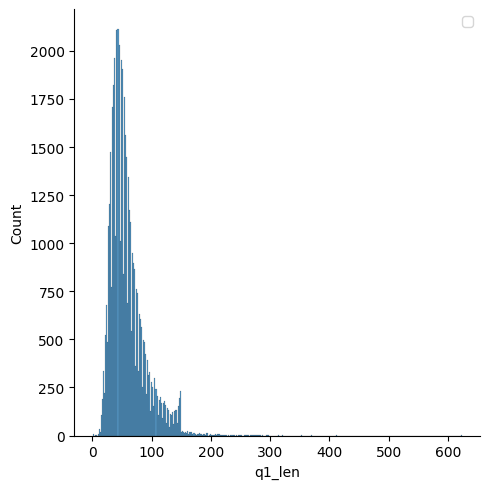

In [ ]:
# Analysis of features
sns.displot(new_df['q1_len'])
plt.legend()
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 1
maximum characters 1169
average num of characters 60


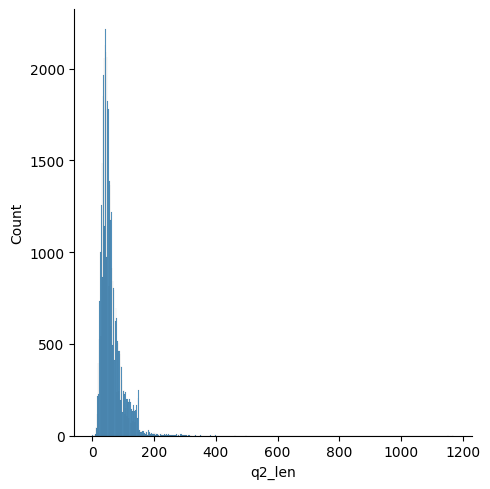

In [ ]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 125
average num of words 10


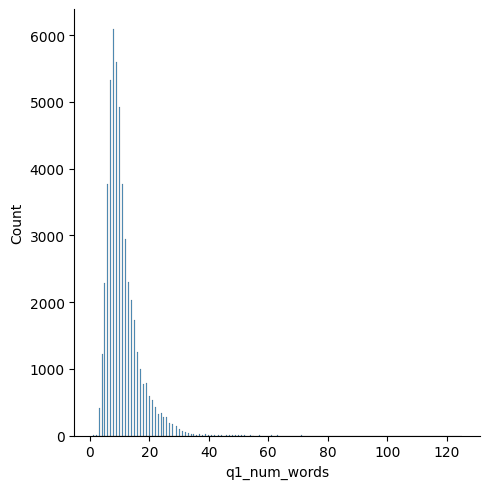

In [ ]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


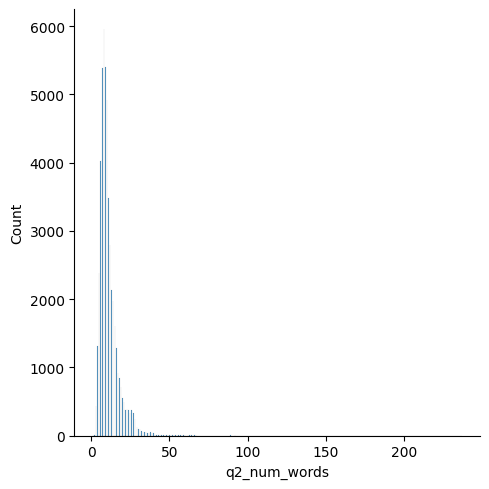

In [ ]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))


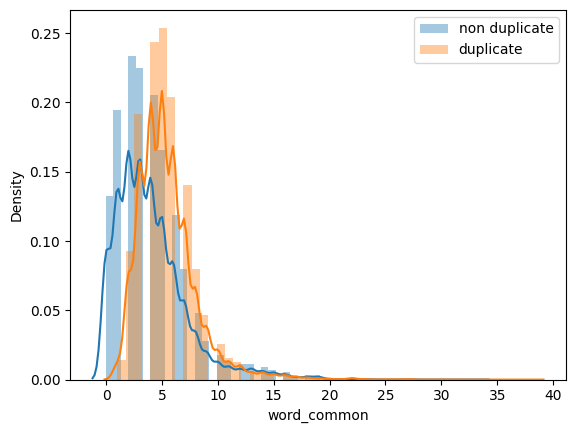

In [ ]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

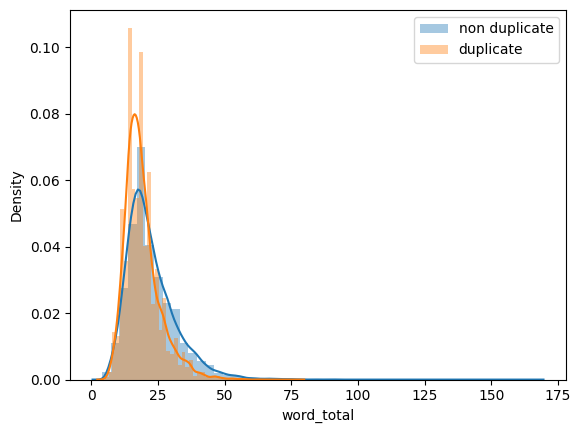

In [ ]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

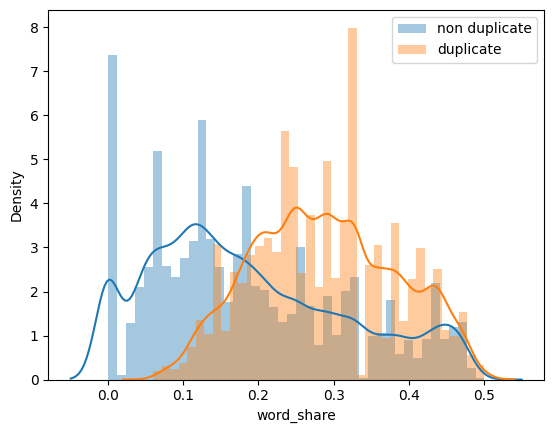

In [ ]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [ ]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
36819,Should I take advice from people on Quora or j...,Quora: Should I take advice from people on Quora?
23918,How much will it cost to design and develop a ...,How much would it cost to design and develop a...
1388,What's the best why to start up a cafe?,What are requirements I would need to start my...
53220,How do I get a reply to the first introduction...,Which opening lines should be used in first em...
39500,What are the perks of an IAS?,What are the perks of being an IAS officer?


In [ ]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(50000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
36819,1,69,49,14,9,7,23,0.30
23918,0,71,78,13,13,11,26,0.42
1388,1,39,56,9,11,3,20,0.15
53220,1,76,98,15,20,6,31,0.19
39500,1,29,43,7,9,6,16,0.38


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=30000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

NameError: name 'ques_df' is not defined

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape


In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
91151,0.0,49,72,7,14,0,19,0.00,0,0,...,0,0,0,0,2,0,0,0,0,0
111947,0.0,53,47,9,8,3,17,0.18,0,0,...,0,0,0,0,0,0,0,0,0,0
6167,1.0,44,39,8,7,5,15,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
117146,1.0,39,43,8,8,3,16,0.19,0,0,...,0,0,0,0,0,0,0,0,0,0
58131,1.0,56,38,12,9,2,21,0.10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.77

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
Y_pred = xgb.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.767

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df =  DecisionTreeClassifier()
df.fit(X_train,Y_train)
Y_pred = df.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7148333333333333

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7416666666666667